<a href="https://colab.research.google.com/github/souradipta93/Social_Media_-_Web_Analytics/blob/main/network_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Network Analysis - Disease Network

### Import

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.

### Load and process data

In [ ]:
# load data
df = pd.read_csv("disease3.csv")
df.head()

,Source,Target,Weight,comorb
0,A164,A121,5,2
1,A121,A132,31,3
2,A190,A121,18,1
3,A155,A121,6,1
4,A137,A121,5,1


## Create Network Object

In [ ]:
# load pandas df as networkx graph
G = nx.from_pandas_edgelist(df, 
                            source='Source', 
                            target='Target', 
                            edge_attr='Weight', )
print("No of unique people:", len(G.nodes))
print("No of connections:", len(G.edges))


No of unique people: 52
No of connections: 52


In [ ]:
# Iterate over df rows and set the source and target nodes' attributes for each row:
for index, row in df.iterrows():
    G.nodes[row['Source']]['comorb'] = row['comorb']
print(G.nodes(data=True))

[('A164', {'comorb': 2}), ('A121', {'comorb': 3}), ('A132', {'comorb': 1}), ('A190', {'comorb': 1}), ('A155', {'comorb': 1}), ('A137', {'comorb': 1}), ('A126', {'comorb': 2}), ('A217', {'comorb': 3}), ('A218', {'comorb': 3}), ('A133', {'comorb': 3}), ('A176', {'comorb': 3}), ('A201', {'comorb': 3}), ('A199', {'comorb': 2}), ('A216', {'comorb': 1}), ('A125', {'comorb': 2}), ('A189', {'comorb': 3}), ('A152', {'comorb': 1}), ('A175', {'comorb': 1}), ('A247', {'comorb': 3}), ('A194', {'comorb': 3}), ('A138', {'comorb': 3}), ('A173', {'comorb': 3}), ('A111', {'comorb': 2}), ('A151', {'comorb': 1}), ('A271', {'comorb': 3}), ('A195', {'comorb': 2}), ('A163', {'comorb': 2}), ('A234', {'comorb': 3}), ('A174', {'comorb': 1}), ('A231', {'comorb': 2}), ('A124', {'comorb': 2}), ('A130', {'comorb': 1}), ('A214', {'comorb': 3}), ('A136', {'comorb': 1}), ('A191', {'comorb': 2}), ('A103', {'comorb': 1}), ('A150', {'comorb': 3}), ('A118', {'comorb': 1}), ('A147', {'comorb': 1}), ('A116', {'comorb': 3}),

## Visualizing the Network using NetworkX

C:\Users\SOURADIPTA\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


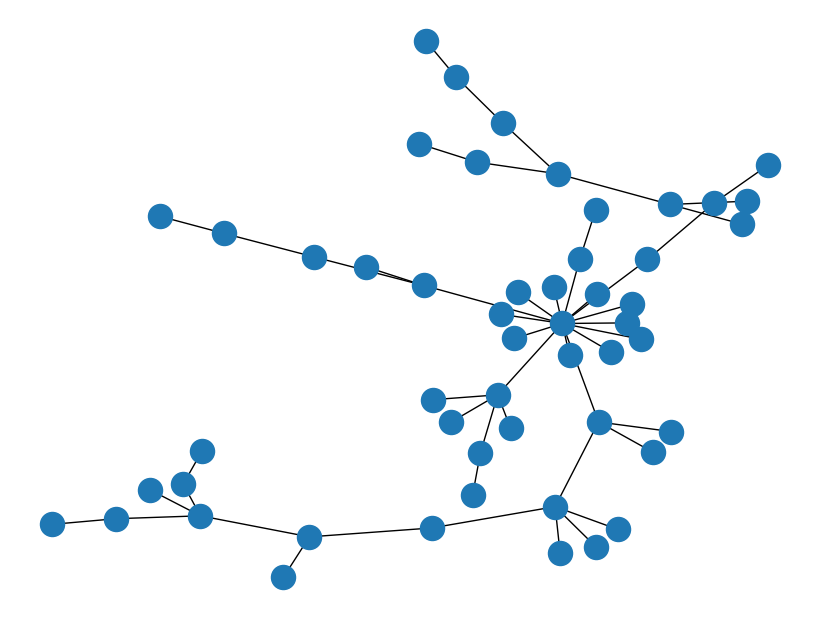

In [ ]:
# Simple plot
plt.figure(figsize=(8,6), dpi=100) 
nx.draw(G)

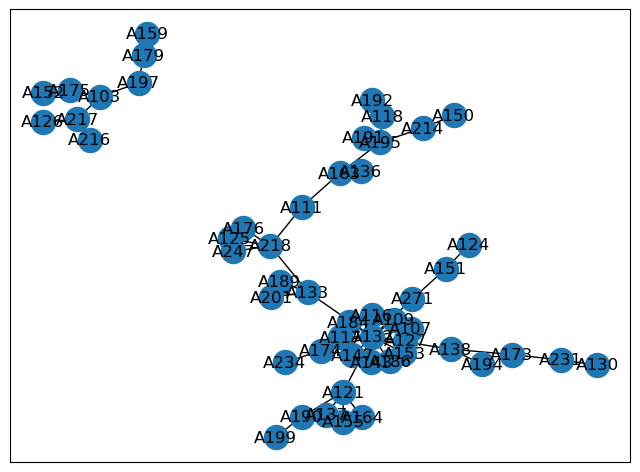

In [ ]:
# all graph options
graphs_viz_options = [nx.draw, 
                      nx.draw_networkx, 
                      nx.draw_circular, 
                      nx.draw_kamada_kawai,
                      nx.draw_random, 
                      nx.draw_shell, 
                      nx.draw_spring]

# plot graph option
selected_graph_option = 1

# plot
plt.figure(figsize=(8,6), dpi=100) 
graphs_viz_options[selected_graph_option](G)

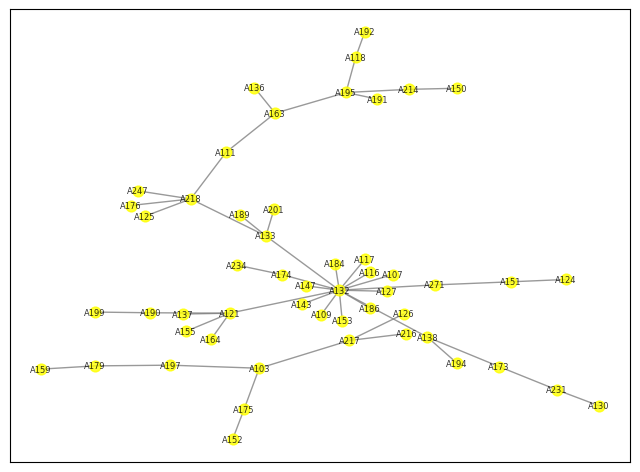

In [ ]:
#Format the plot - improve readability
plt.figure(figsize=(8,6), dpi=100) 
nx.draw_networkx(G, 
                 node_size=60, 
                 edge_color = 'grey',
                 node_color = 'yellow',
                 font_size=6, 
                alpha=0.8)

## Add network attributes for visualisation

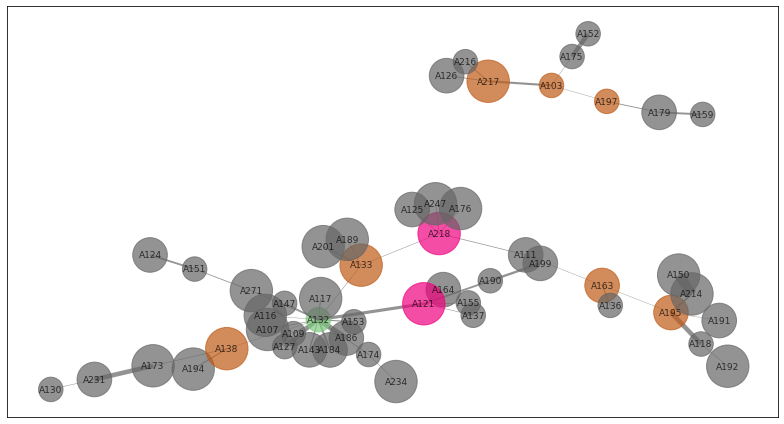

In [ ]:
# fixing the size of the figure
plt.figure(figsize =(11, 6))
  
node_color = [G.degree(v) for v in G]
# node colour is a list of degrees of nodes
  
node_size = [600 * nx.get_node_attributes(G, 'comorb')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.1 * G[u][v]['Weight'] for u, v in G.edges()]
# width of edge is a list of weight of edges

  
nx.draw_networkx(G, 
                 node_size = node_size, 
                 node_color = node_color, 
                 alpha = 0.7,
                 font_size=9,
                 with_labels = True, 
                 width = edge_width,
                 edge_color ='.4', 
                 cmap = plt.cm.Accent_r)
  

plt.tight_layout();

## Network Attributes

In [ ]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 52
Number of edges: 52
Average degree:   2.0000


In [ ]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.0392156862745098


In [ ]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

In [ ]:
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)

In [ ]:
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
('A132', 17)
('A121', 5)
('A218', 5)
('A133', 4)
('A195', 4)
('A197', 4)
('A217', 3)
('A138', 3)
('A163', 3)
('A103', 3)
('A190', 2)
('A175', 2)
('A173', 2)
('A111', 2)
('A151', 2)
('A271', 2)
('A174', 2)
('A231', 2)
('A214', 2)
('A118', 2)


In [ ]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality


# Assign each to an attribute in your network
nx.set_node_attributes(G, betweenness_dict, 'betweenness')


In [ ]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 20 nodes by betweenness centrality:")
for b in sorted_betweenness[:20]:
    print(b)

Top 20 nodes by betweenness centrality:
('A132', 0.5584313725490195)
('A133', 0.3388235294117647)
('A218', 0.30588235294117644)
('A111', 0.21333333333333332)
('A163', 0.19686274509803922)
('A121', 0.15215686274509804)
('A195', 0.15137254901960784)
('A138', 0.12156862745098039)
('A173', 0.06274509803921569)
('A271', 0.06274509803921569)
('A190', 0.03215686274509804)
('A151', 0.03215686274509804)
('A174', 0.03215686274509804)
('A231', 0.03215686274509804)
('A214', 0.03215686274509804)
('A118', 0.03215686274509804)
('A103', 0.016470588235294115)
('A217', 0.010196078431372548)
('A197', 0.009411764705882352)
('A175', 0.005490196078431373)


In [ ]:
#First get the top 20 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:20]

#Then find and print their degree
for tb in top_betweenness: # Loop through top_betweenness
    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree)

Name: A132 | Betweenness Centrality: 0.5584313725490195 | Degree: 17
Name: A133 | Betweenness Centrality: 0.3388235294117647 | Degree: 4
Name: A218 | Betweenness Centrality: 0.30588235294117644 | Degree: 5
Name: A111 | Betweenness Centrality: 0.21333333333333332 | Degree: 2
Name: A163 | Betweenness Centrality: 0.19686274509803922 | Degree: 3
Name: A121 | Betweenness Centrality: 0.15215686274509804 | Degree: 5
Name: A195 | Betweenness Centrality: 0.15137254901960784 | Degree: 4
Name: A138 | Betweenness Centrality: 0.12156862745098039 | Degree: 3
Name: A173 | Betweenness Centrality: 0.06274509803921569 | Degree: 2
Name: A271 | Betweenness Centrality: 0.06274509803921569 | Degree: 2
Name: A190 | Betweenness Centrality: 0.03215686274509804 | Degree: 2
Name: A151 | Betweenness Centrality: 0.03215686274509804 | Degree: 2
Name: A174 | Betweenness Centrality: 0.03215686274509804 | Degree: 2
Name: A231 | Betweenness Centrality: 0.03215686274509804 | Degree: 2
Name: A214 | Betweenness Centrality

In [ ]:
communities = community.greedy_modularity_communities(G)
communities

[frozenset({'A107',
            'A109',
            'A116',
            'A117',
            'A127',
            'A132',
            'A143',
            'A147',
            'A153',
            'A174',
            'A184',
            'A186',
            'A234'}),
 frozenset({'A111',
            'A125',
            'A133',
            'A136',
            'A163',
            'A176',
            'A189',
            'A201',
            'A218',
            'A247'}),
 frozenset({'A103',
            'A126',
            'A152',
            'A159',
            'A175',
            'A179',
            'A197',
            'A216',
            'A217'}),
 frozenset({'A121', 'A137', 'A155', 'A164', 'A190', 'A199'}),
 frozenset({'A118', 'A150', 'A191', 'A192', 'A195', 'A214'}),
 frozenset({'A130', 'A138', 'A173', 'A194', 'A231'}),
 frozenset({'A124', 'A151', 'A271'})]

In [ ]:
for i,c in enumerate(communities): # Loop through the list of communities
    if len(c) > 2: # Filter out modularity classes with 2 or fewer nodes
        print('Class '+str(i)+':', list(c)) # Print out the classes and their members

Class 0: ['A116', 'A186', 'A147', 'A132', 'A127', 'A143', 'A184', 'A109', 'A174', 'A153', 'A107', 'A117', 'A234']
Class 1: ['A111', 'A218', 'A201', 'A125', 'A189', 'A133', 'A163', 'A247', 'A136', 'A176']
Class 2: ['A126', 'A217', 'A159', 'A175', 'A103', 'A197', 'A216', 'A179', 'A152']
Class 3: ['A164', 'A137', 'A190', 'A155', 'A121', 'A199']
Class 4: ['A192', 'A195', 'A214', 'A150', 'A191', 'A118']
Class 5: ['A231', 'A138', 'A194', 'A173', 'A130']
Class 6: ['A271', 'A151', 'A124']


## Directed Networks

In [ ]:
df.head()

,Source,Target,Weight,comorb
0,A164,A121,5,2
1,A121,A132,31,3
2,A190,A121,18,1
3,A155,A121,6,1
4,A137,A121,5,1


In [ ]:
df1 = df[['Source', 'Target']]
tuples = [tuple(x) for x in df1.to_numpy()]

In [ ]:
random_pos = nx.random_layout(G, seed=42)
#pos = nx.spring_layout(graph, pos=random_pos)

C:\Users\SOURADIPTA\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


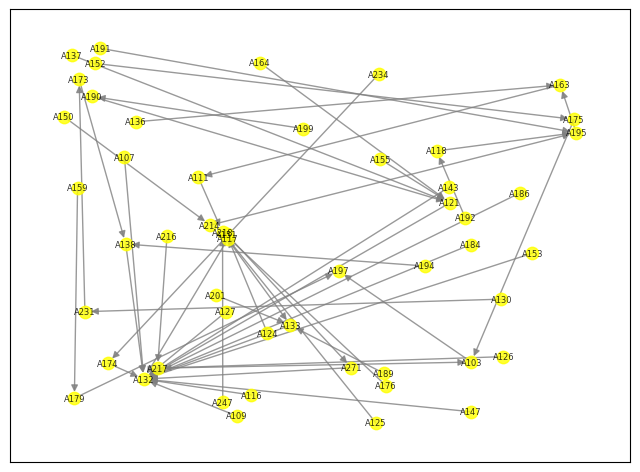

In [ ]:
G1 = nx.DiGraph()
G1.add_edges_from(tuples)

plt.figure(figsize=(8,6), dpi=100) 
nx.draw_networkx(G1, 
                 node_size=80, 
                 edge_color = 'grey',
                 node_color = 'yellow',
                 font_size=6, 
                alpha=0.8, 
                pos=random_pos)

In [ ]:
# fixing the size of the figure
plt.figure(figsize =(11, 6))
  
node_color = [G1.in_degree(v) for v in G1]
# node colour is a list of degrees of nodes
  


<Figure size 792x432 with 0 Axes>

In [ ]:
node_size = [300 * nx.get_node_attributes(G, 'comorb')[v] for v in G]
# size of node is a list of population of cities
  
edge_width = [0.01 * G[u][v]['Weight'] for u, v in G.edges()]
# width of edge is a list of weight of edges

In [ ]:
random_pos = nx.random_layout(G1, seed=42)
#pos = nx.spring_layout(graph, pos=random_pos)

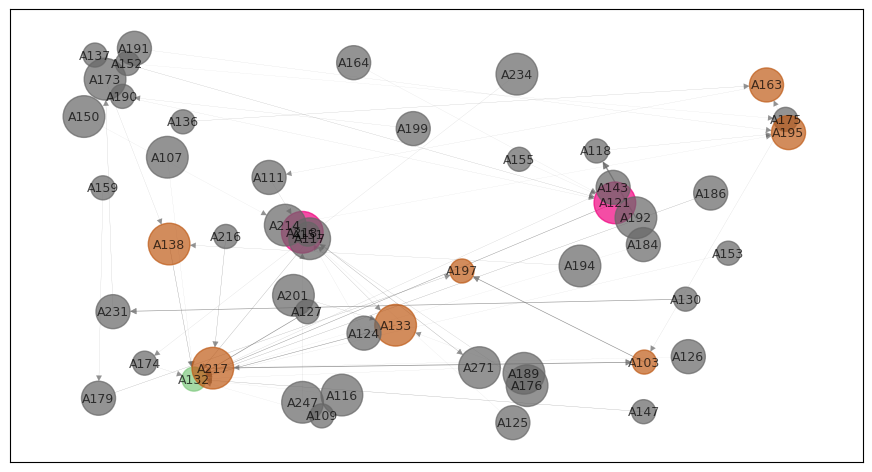

In [ ]:

plt.figure(figsize=(11,6), dpi=100) 
nx.draw_networkx(G1, 
                 node_size = node_size, 
                 node_color = node_color, 
                 alpha = 0.7,
                 font_size=9,
                 with_labels = True, 
                 width = edge_width,
                 edge_color ='.4', 
                 cmap = plt.cm.Accent_r, 
              pos=random_pos)
  


In [ ]:
G1.in_degree()

InDegreeView({'A164': 0, 'A121': 4, 'A132': 16, 'A190': 1, 'A155': 0, 'A137': 0, 'A126': 0, 'A217': 2, 'A218': 4, 'A133': 3, 'A176': 0, 'A201': 0, 'A199': 0, 'A216': 0, 'A125': 0, 'A189': 0, 'A152': 0, 'A175': 1, 'A247': 0, 'A194': 0, 'A138': 2, 'A173': 1, 'A111': 1, 'A151': 1, 'A271': 1, 'A195': 3, 'A163': 2, 'A234': 0, 'A174': 1, 'A231': 1, 'A124': 0, 'A130': 0, 'A214': 1, 'A136': 0, 'A191': 0, 'A103': 2, 'A150': 0, 'A118': 1, 'A147': 0, 'A116': 0, 'A186': 0, 'A109': 0, 'A127': 0, 'A143': 0, 'A153': 0, 'A107': 0, 'A192': 0, 'A184': 0, 'A197': 3, 'A179': 1, 'A159': 0, 'A117': 0})

In [ ]:
G1.out_degree()

OutDegreeView({'A164': 1, 'A121': 1, 'A132': 1, 'A190': 1, 'A155': 1, 'A137': 1, 'A126': 1, 'A217': 1, 'A218': 1, 'A133': 1, 'A176': 1, 'A201': 1, 'A199': 1, 'A216': 1, 'A125': 1, 'A189': 1, 'A152': 1, 'A175': 1, 'A247': 1, 'A194': 1, 'A138': 1, 'A173': 1, 'A111': 1, 'A151': 1, 'A271': 1, 'A195': 1, 'A163': 1, 'A234': 1, 'A174': 1, 'A231': 1, 'A124': 1, 'A130': 1, 'A214': 1, 'A136': 1, 'A191': 1, 'A103': 1, 'A150': 1, 'A118': 1, 'A147': 1, 'A116': 1, 'A186': 1, 'A109': 1, 'A127': 1, 'A143': 1, 'A153': 1, 'A107': 1, 'A192': 1, 'A184': 1, 'A197': 1, 'A179': 1, 'A159': 1, 'A117': 1})